# Trabalho de Bases Computacionais da Ciência

>## Victória Nedina Nunes (R.A: 11201921149)
>## Tatiana Ayumi Ozono (R.A: 11201921864) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
%matplotlib notebook


In [2]:
nivel_instrucao = pd.read_csv("nivel_instrucao.csv", sep=";")
ocupacao = pd.read_csv("ocupacao.csv", sep=";")
renda = pd.read_csv("renda.csv", sep=";")
agua = pd.read_csv("agua.csv", sep=";")
pop_residente = pd.read_csv("pop_residente.csv", sep=";")


# Gráfico em linha

Gráfico de linhas que apresenta o total de crianças economicamente ativas em casa estado da região centro-oeste do Brasil.

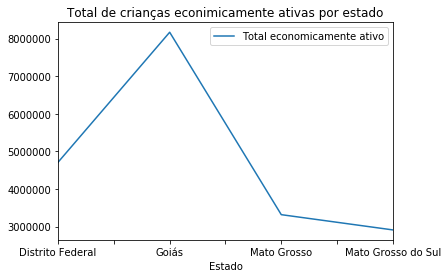

In [19]:
ocupacao["Total economicamente ativo"] = ocupacao["Total pessoas > 10 anos"] + ocupacao["Total pessoas 10 a 13 anos"]
est = (ocupacao["Estado"] == "Goiás")|(ocupacao["Estado"] == "Mato Grosso")|(ocupacao["Estado"] == "Mato Grosso do Sul")|(ocupacao["Estado"] == "Distrito Federal")
ocupacao_estado = ocupacao[est].groupby("Estado")
ocupacao_estado.agg("sum").plot(y=["Total economicamente ativo"], kind="line", title = "Total de crianças econimicamente ativas por estado")


# Gráfico em barra

O gráfico de barras a seguir mostra o nível de instrução da população do município de São Paulo.

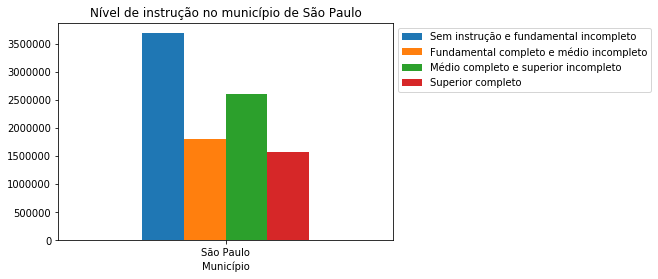

In [21]:
condicao = (nivel_instrucao["Município"] == "São Paulo")
nivel_instrucao[condicao].plot(x="Município", y=["Sem instrução e fundamental incompleto", "Fundamental completo e médio incompleto", "Médio completo e superior incompleto", "Superior completo"],
                    kind="bar", title = "Nível de instrução no município de São Paulo", rot=360).legend(bbox_to_anchor=(1, 1))

# Gráfico em barra empilhada

Os dados expostos abaixo tem como objetivo apresentar a média do nível de instrução na região Nordeste do Brasil.

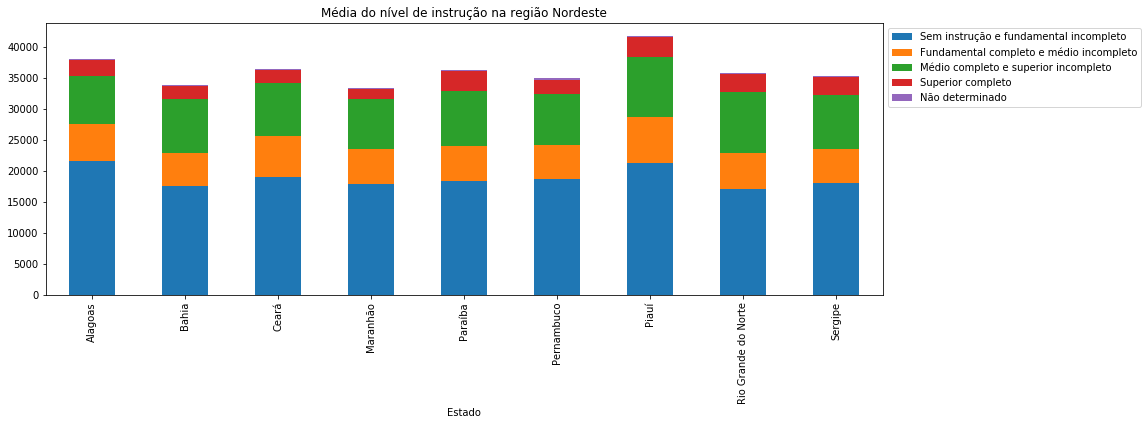

In [10]:
condi1 = (nivel_instrucao["Estado"] == "Maranhão") | (nivel_instrucao["Estado"] == "Ceará") | (nivel_instrucao["Estado"] == "Piauí") | (nivel_instrucao["Estado"] == "Bahia") | (nivel_instrucao["Estado"] == "Rio Grande do Norte") | (nivel_instrucao["Estado"] == "Paraíba") | (nivel_instrucao["Estado"] == "Pernambuco") | (nivel_instrucao["Estado"] == "Alagoas") | (nivel_instrucao["Estado"] == "Sergipe")
senhoramado = nivel_instrucao[condi1].groupby("Estado").agg("mean")
senhoramado.plot(y=["Sem instrução e fundamental incompleto","Fundamental completo e médio incompleto","Médio completo e superior incompleto","Superior completo","Não determinado"], 
                 kind="bar", stacked=True, figsize=(15,5), title = "Média do nível de instrução na região Nordeste").legend(bbox_to_anchor=(1, 1))

# Histograma

O histograma informa o total de residentes em cada estado do Brasil. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D985C9A20>]],
      dtype=object)

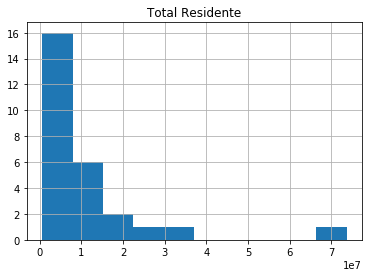

In [60]:
pop_residente.groupby("Estado").agg("sum").hist("Total Residente")

# Gráfico em pizza

Informações sobre os estados brasileiros que possuem salário acima de 20M

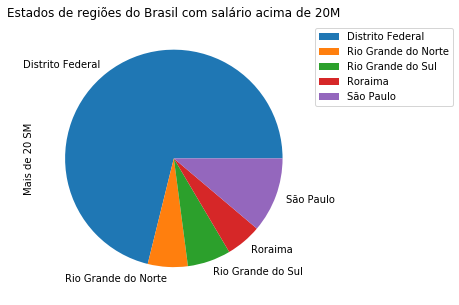

In [11]:
condicao =(renda["Estado"] == "São Paulo") | (renda["Estado"] == "Roraima") | (renda["Estado"] == "Rio Grande do Norte")| (renda["Estado"] == "Distrito Federal") | (renda["Estado"] == "Rio Grande do Sul")
renda2 = renda[condicao].groupby("Estado").agg("mean")
renda2.plot(y="Mais de 20 SM", kind="pie", figsize=(5,5), title="Estados de regiões do Brasil com salário acima de 20M").legend(bbox_to_anchor=(1, 1))

# Boxplot

descrição do gráfico

<IPython.core.display.Javascript object>


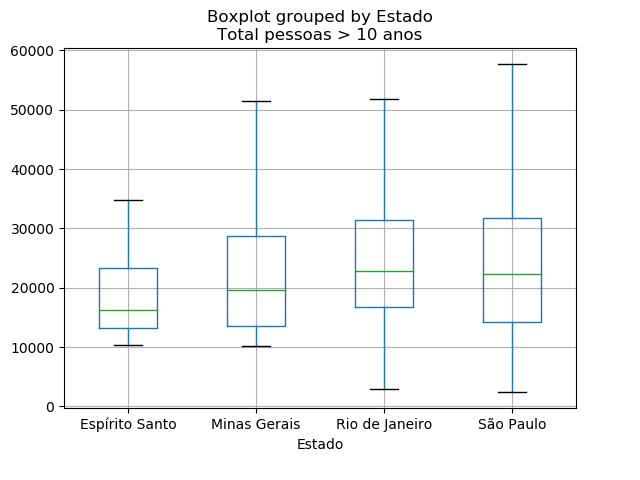

In [100]:
condicao = (ocupacao["Estado"] == "São Paulo") | (renda["Estado"] == "Rio de Janeiro") | (renda["Estado"] == "Minas Gerais") | (renda["Estado"] == "Espírito Santo")
ocupacao[condicao].boxplot("Total pessoas > 10 anos", by="Estado", rot=360, showfliers=False)

# Questão 1

Ao compararamos a renda com o nível de instrução de cada indivíduo, qual é a chance de possuir um salário maior que 20 SM? (não sei formular uma pergunta pra essa, eu só pensei T^T)

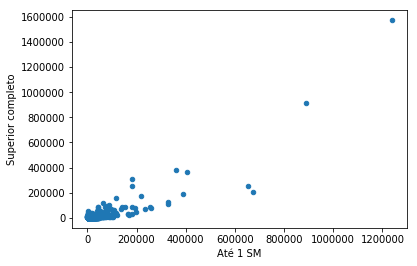

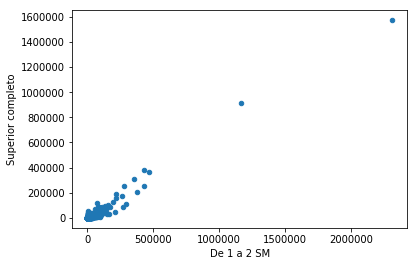

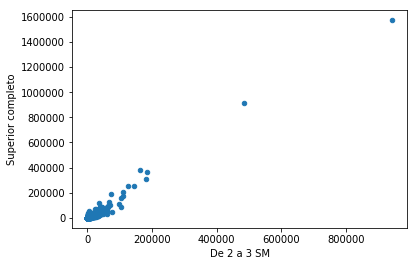

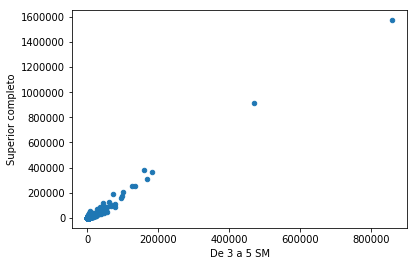

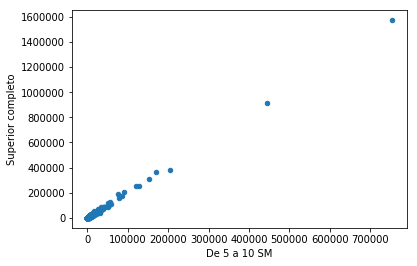

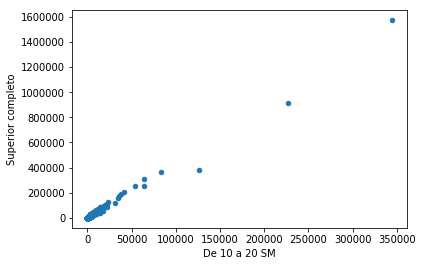

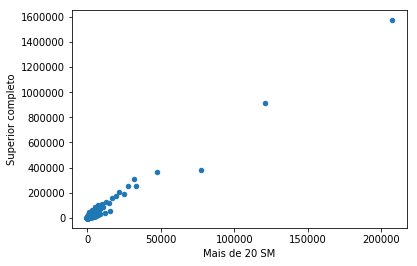

In [13]:
renda_instrucao = pd.merge(renda,nivel_instrucao)
renda_instrucao.plot(x="Até 1 SM", y="Superior completo", kind="scatter")
renda_instrucao.plot(x="De 1 a 2 SM", y="Superior completo", kind="scatter")
renda_instrucao.plot(x="De 2 a 3 SM", y="Superior completo", kind="scatter")
renda_instrucao.plot(x="De 3 a 5 SM", y="Superior completo", kind="scatter")
renda_instrucao.plot(x="De 5 a 10 SM", y="Superior completo", kind="scatter")
renda_instrucao.plot(x="De 10 a 20 SM", y="Superior completo", kind="scatter")
renda_instrucao.plot(x="Mais de 20 SM", y="Superior completo", kind="scatter")

# Questão 2

Qual região tem maior concentração de residentes estrangeiros?

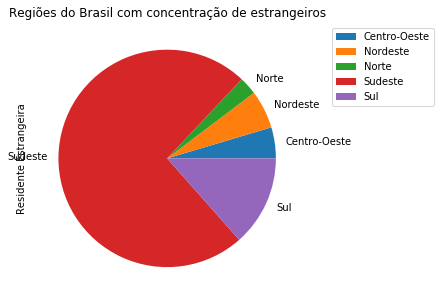

In [20]:
su =  (pop_residente["Estado"] == "Rio Grande do Sul")|(pop_residente["Estado"] == "Paraná")|(pop_residente["Estado"] == "Santa Catarina")
nord = (pop_residente["Estado"] == "Maranhão") | (pop_residente["Estado"] == "Ceará") | (pop_residente["Estado"] == "Piauí") | (pop_residente["Estado"] == "Bahia") | (pop_residente["Estado"] == "Rio Grande do Norte") | (pop_residente["Estado"] == "Paraíba") | (pop_residente["Estado"] == "Pernambuco") | (pop_residente["Estado"] == "Alagoas") | (pop_residente["Estado"] == "Sergipe")
nort = (pop_residente["Estado"] == "Amazonas")|(pop_residente["Estado"] == "Roraima")|(pop_residente["Estado"] == "Amapá")|(pop_residente["Estado"] == "Pará")|(pop_residente["Estado"] == "Tocantis")|(pop_residente["Estado"] == "Rondônia")|(pop_residente["Estado"] == "Rondônia")|(pop_residente["Estado"] == "Acre")
co = (pop_residente["Estado"] == "Goiás")|(pop_residente["Estado"] == "Mato Grosso")|(pop_residente["Estado"] == "Mato Grosso do Sul")|(pop_residente["Estado"] == "Distrito Federal")
sud = (pop_residente["Estado"] == "São Paulo")|(pop_residente["Estado"] == "Minas Gerais")|(pop_residente["Estado"] == "Espírito Santo")|(pop_residente["Estado"] == "Rio de Janeiro")

for i in list(pop_residente[nort].index.values):
    pop_residente.at[i,"Região"] = "Norte"
for i in list(pop_residente[sud].index.values):
    pop_residente.at[i,"Região"] = "Sudeste"
for i in list(pop_residente[su].index.values):
    pop_residente.at[i,"Região"] = "Sul"
for i in list(pop_residente[co].index.values):
    pop_residente.at[i,"Região"] = "Centro-Oeste"
for i in list(pop_residente[nord].index.values):
    pop_residente.at[i,"Região"] = "Nordeste"
    
regioes = pop_residente.groupby("Região").agg("sum")
regioes.plot(y="Residente Estrangeira", kind="pie", figsize=(5,5), title="Regiões do Brasil com concentração de estrangeiros").legend(bbox_to_anchor=(1.5, 1))


# Questão 3

Qual regiãol possui mais domicílios com água quando o indivíduo não possui renda?

,Total domicílios,Água em pelo menos um cômodo,Água no terreno ou propriedade,Não tinham,Total pessoas > 10 anos,Até 1 SM,De 1 a 2 SM,De 2 a 3 SM,De 3 a 5 SM,De 5 a 10 SM,De 10 a 20 SM,Mais de 20 SM,Sem rendimento,Código da Unidade Geográfica,Domicílios com água
Total domicílios,1.000000,0.997042,0.719432,0.105482,0.968512,0.828893,0.951094,0.942980,0.944345,0.939485,0.917318,0.899266,0.955674,-0.086162,0.998164
Água em pelo menos um cômodo,0.997042,1.000000,0.679821,0.031880,0.964648,0.809368,0.955340,0.949367,0.950281,0.944024,0.920938,0.902235,0.946784,-0.045755,0.999676
Água no terreno ou propriedade,0.719432,0.679821,1.000000,0.401616,0.709499,0.713750,0.642333,0.619128,0.622239,0.628792,0.619555,0.616972,0.739181,-0.328184,0.698273
Não tinham,0.105482,0.031880,0.401616,1.000000,0.110926,0.294134,0.011095,-0.013803,-0.007713,0.008668,0.018296,0.021741,0.168539,-0.500839,0.045061
Total pessoas > 10 anos,0.968512,0.964648,0.709499,0.110926,1.000000,0.880286,0.977404,0.963678,0.961216,0.952035,0.925537,0.906089,0.990627,-0.108784,0.966200
Até 1 SM,0.828893,0.809368,0.713750,0.294134,0.880286,1.000000,0.788197,0.735310,0.731507,0.731347,0.715603,0.696307,0.899640,-0.311737,0.814783
De 1 a 2 SM,0.951094,0.955340,0.642333,0.011095,0.977404,0.788197,1.000000,0.987655,0.972403,0.946784,0.907435,0.887287,0.951882,-0.000249,0.954782
De 2 a 3 SM,0.942980,0.949367,0.619128,-0.013803,0.963678,0.735310,0.987655,1.000000,0.991297,0.967823,0.927595,0.903708,0.931520,0.024263,0.948147
De 3 a 5 SM,0.944345,0.950281,0.622239,-0.007713,0.961216,0.731507,0.972403,0.991297,1.000000,0.987504,0.955539,0.930595,0.927546,0.014580,0.949147
De 5 a 10 SM,0.939485,0.944024,0.628792,0.008668,0.952035,0.731347,0.946784,0.967823,0.987504,1.000000,0.986154,0.965511,0.918664,0.000033,0.943268


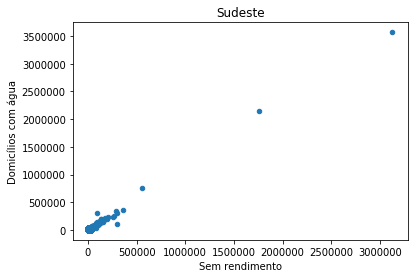

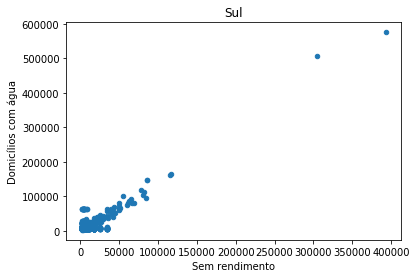

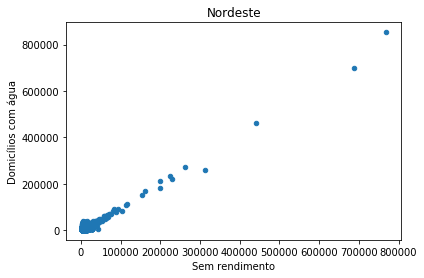

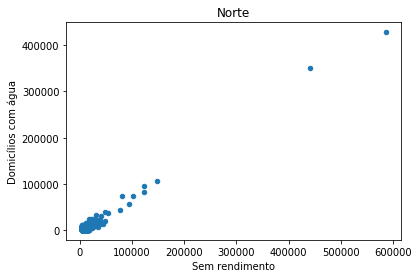

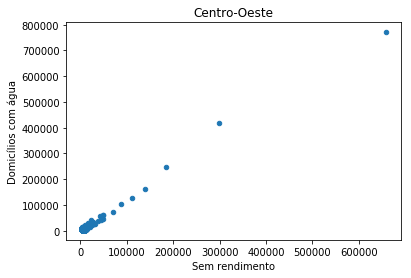

In [25]:
agua_renda = pd.merge(agua,renda)

agua_renda["Domicílios com água"] = agua_renda["Água em pelo menos um cômodo"] + agua_renda["Água no terreno ou propriedade"]

sudeste = (agua_renda["Estado"] == "São Paulo")|(agua_renda["Estado"] == "Minas Gerais")|(agua_renda["Estado"] == "Espírito Santo")|(agua_renda["Estado"] == "Rio de Janeiro")
sul = (agua_renda["Estado"] == "Rio Grande do Sul")|(agua_renda["Estado"] == "Paraná")|(agua_renda["Estado"] == "Santa Catarina")
nordeste = (agua_renda["Estado"] == "Maranhão") | (agua_renda["Estado"] == "Ceará") | (agua_renda["Estado"] == "Piauí") | (agua_renda["Estado"] == "Bahia") | (agua_renda["Estado"] == "Rio Grande do Norte") | (agua_renda["Estado"] == "Paraíba") | (agua_renda["Estado"] == "Pernambuco") | (agua_renda["Estado"] == "Alagoas") | (agua_renda["Estado"] == "Sergipe")
norte = (agua_renda["Estado"] == "Amazonas")|(agua_renda["Estado"] == "Roraima")|(agua_renda["Estado"] == "Amapá")|(agua_renda["Estado"] == "Pará")|(agua_renda["Estado"] == "Tocantis")|(agua_renda["Estado"] == "Rondônia")|(agua_renda["Estado"] == "Rondônia")|(agua_renda["Estado"] == "Acre")
centro_oeste = (agua_renda["Estado"] == "Goiás")|(agua_renda["Estado"] == "Mato Grosso")|(agua_renda["Estado"] == "Mato Grosso do Sul")|(agua_renda["Estado"] == "Distrito Federal")

agua_renda[sudeste].plot(x="Sem rendimento", y="Domicílios com água", kind="scatter", title = "Sudeste")
agua_renda[sul].plot(x="Sem rendimento", y="Domicílios com água", kind="scatter", title = "Sul" )
agua_renda[nordeste].plot(x="Sem rendimento", y="Domicílios com água", kind="scatter", title = "Nordeste" )
agua_renda[norte].plot(x="Sem rendimento", y="Domicílios com água", kind="scatter", title = "Norte" )
agua_renda[centro_oeste].plot(x="Sem rendimento", y="Domicílios com água", kind="scatter", title = "Centro-Oeste" )
display(agua_renda.corr())

# Questão 4

Qual a proporção entre pessoas economicamente ativas e desocupadas nas metrópoles brasileiras?

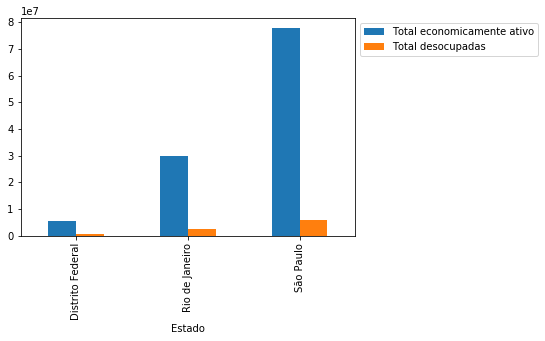

In [21]:
ocupacao["Total desocupadas"] = ocupacao["Desocupadas.1"] + ocupacao["Desocupadas.2"] + ocupacao["Desocupadas"]
ocupacao["Total economicamente ativo"] = ocupacao["Economicamente ativas"] + ocupacao["Economicamente ativas.1"] + ocupacao["Economicamente ativas.2"]

capitais = (ocupacao["Estado"] == "Distrito Federal")|(ocupacao["Estado"] == "São Paulo")|(ocupacao["Estado"] == "Rio de Janeiro")
agrupado = ocupacao[capitais].groupby("Estado").agg("sum")
agrupado.plot(y=["Total economicamente ativo", "Total desocupadas"],kind="bar").legend(bbox_to_anchor=(1, 1))

# Questão 5

Do total entrevistado do estado de São Paulo, quantos domicílios possuem água canalizada?

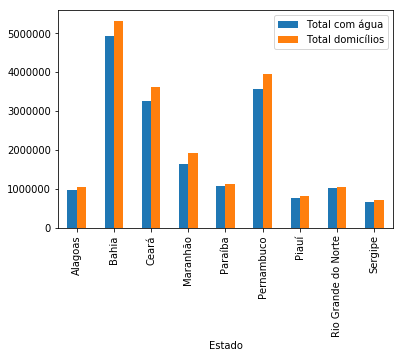

In [35]:
agua["Total com água"] = agua["Água em pelo menos um cômodo"] + agua["Água no terreno ou propriedade"]

reg_nord = (agua["Estado"] == "Maranhão") | (agua["Estado"] == "Ceará") | (agua["Estado"] == "Piauí") | (agua["Estado"] == "Bahia") | (agua["Estado"] == "Rio Grande do Norte") | (agua["Estado"] == "Paraíba") | (agua["Estado"] == "Pernambuco") | (agua["Estado"] == "Alagoas") | (agua["Estado"] == "Sergipe")
tudo = agua[reg_nord].groupby("Estado").agg("sum")
tudo.plot(y=["Total com água","Total domicílios"], kind="bar").legend(bbox_to_anchor=(1, 1))

# Questão 6

# Questão 7

# Questão 8

# Questão 9

# Questão 10